# What are Gaussian Mixture Models?

Before we discuss Gaussian Mixture Models (GMMs), let's understand what Mixture Models are. A Mixture Model is a type of probability density model where we assume that the data is governed by a number of component distributions. 

Let's look at an example to understand how Mixture Models work. We want to model the shopping habits of all the people in South America. One way to do it would be model the whole continent and fit everything into a single model. But we know that people in different countries shop differently. We need to understand how people in individual countries shop and how they behave.

If we want to get a good representative model, we need to account for all the variations within the continent. In this case, we can use mixture models to model the shopping habits of individual countries and then combine all of them into a Mixture Model. This way, we are not missing the nuances of the underlying behavior of individual countries. By not enforcing a single model on all the countries, we are able to extract a more accurate model.

# Building a classifier based on Gaussian Mixture Models


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import patches 
 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture 
from sklearn.model_selection import StratifiedKFold

Let's use the iris dataset available in scikit-learn for analysis:

In [2]:
# Load the iris dataset 
iris = datasets.load_iris() 

Split the dataset into training and testing using an 80/20 split. The n_splits parameter specifies the number of subsets you'll obtain. We are using a value of 5, which means the dataset will be split into five parts. We will use four parts for training and one part for testing, which gives a split of 80/20:

In [14]:
# Split dataset into training and testing (80/20 split) 
indices = StratifiedKFold(n_splits=5)
splitNum = indices.split(iris.data, iris.target)

Extract the training data:

In [19]:
# Take the first fold 
train_index, test_index = next(iter(splitNum)) 
 
# Extract training data and labels 
X_train = iris.data[train_index] 
y_train = iris.target[train_index] 
 
# Extract testing data and labels 
X_test = iris.data[test_index] 
y_test = iris.target[test_index] 

print("Dataset Size: " , np.shape(iris.data))
print("X Train Size: " , np.shape(X_train))
print("y Train Size: " , np.shape(y_train))
print("X Test Size: " , np.shape(X_test))
print("y Test Size: " , np.shape(y_test))


Dataset Size:  (150, 4)
X Train Size:  (120, 4)
y Train Size:  (120,)
X Test Size:  (30, 4)
y Test Size:  (30,)


Extract the number of classes in the training data:

In [7]:
# Extract the number of classes 
num_classes = len(np.unique(y_train)) 
print("Number of class: " , num_classes)

Number of class:  3


Build a GMM-based classifier using the relevant parameters. The n_components parameter specifies the number of components in the underlying distribution. In this case, it will be the number of distinct classes in our data. We need to specify the type of covariance to use. In this case, we will be using full covariance. The init_params parameter controls the parameters that need to be updated during the training process. We have used wc, which means weights and covariance parameters will be updated during training. The n_iter parameter refers to the number of Expectation-Maximization iterations that will be performed during training:

In [28]:
# Build GMM 
classifier = GaussianMixture(n_components=num_classes, covariance_type='full',  
        init_params='kmeans', max_iter=20) 

Initialize the means of the classifier:

In [ ]:
# Initialize the GMM means  
classifier.means_ = np.array([X_train[y_train == i].mean(axis=0) 
                              for i in range(num_classes)]) 

Train the Gaussian mixture model classifier using the training data:

In [30]:
# Train the GMM classifier  
classifier.fit(X_train) 

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=20,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

Visualize the boundaries of the classifier. We will extract the eigenvalues and eigenvectors to estimate how to draw the elliptical boundaries around the clusters. If you need a quick refresher on eigenvalues and eigenvectors, please refer to: https://www.math.hmc.edu/calculus/tutorials/eigenstuff . Let's go ahead and plot:

C:\Users\Lauro Cabral\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


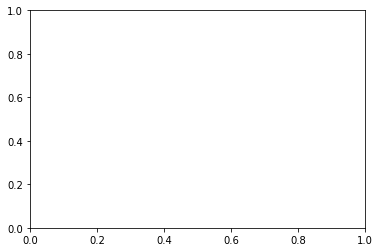

In [42]:
# Draw boundaries 
plt.figure() 
colors = 'bgr' 
for i, color in enumerate(colors): 
    # Extract eigenvalues and eigenvectors 
    eigenvalues, eigenvectors = np.linalg.eigh( 
            classifier.covariances_[i][:2, :2])
    
    # Normalize the first eigenvector 
    norm_vec = eigenvectors[0] / np.linalg.norm(eigenvectors[0]) 
    
    # Extract the angle of tilt 
    angle = np.arctan2(norm_vec[1], norm_vec[0]) 
    angle = 180 * angle / np.pi  
    
    # Scaling factor to magnify the ellipses 
    # (random value chosen to suit our needs) 
    scaling_factor = 8 
    eigenvalues *= scaling_factor  
    
    # Draw the ellipse 
    ellipse = patches.Ellipse(classifier.means_[i, :2],  
            eigenvalues[0], eigenvalues[1], 180 + angle,  
            color=color) 
    axis_handle = plt.subplot(1, 1, 1) 
    ellipse.set_clip_box(axis_handle.bbox) 
    ellipse.set_alpha(0.6) 
    axis_handle.add_artist(ellipse) 

Normalize the first eigenvector:

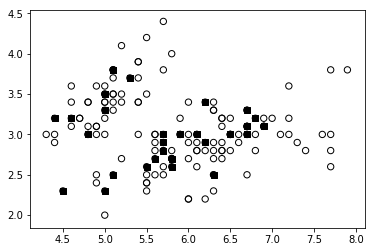

In [44]:
# Plot the data  
colors = 'bgr' 
for i, color in enumerate(colors): 
    cur_data = iris.data[iris.target == i] 
    plt.scatter(cur_data[:,0], cur_data[:,1], marker='o',  
            facecolors='none', edgecolors='black', s=40,  
            label=iris.target_names[i]) 
    test_data = X_test[y_test == i] 
    plt.scatter(test_data[:,0], test_data[:,1], marker='s',  
            facecolors='black', edgecolors='black', s=40,  
            label=iris.target_names[i]) 

Accuracy on training data = 96.66666666666667
Accuracy on testing data = 100.0


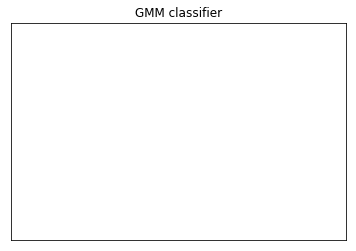

In [45]:
# Compute predictions for training and testing data 
y_train_pred = classifier.predict(X_train) 
accuracy_training = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100 
print('Accuracy on training data =', accuracy_training) 
 
y_test_pred = classifier.predict(X_test) 
accuracy_testing = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100 
print('Accuracy on testing data =', accuracy_testing) 
 
plt.title('GMM classifier') 
plt.xticks(()) 
plt.yticks(()) 
 
plt.show() 

Automatically created module for IPython interactive environment


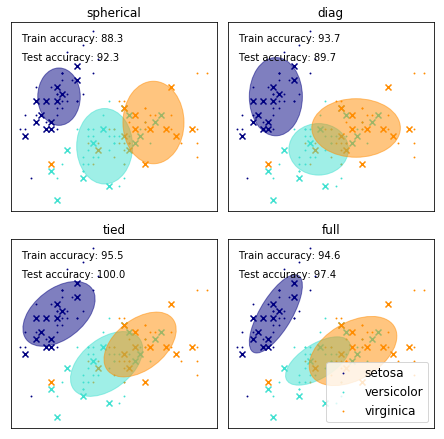

In [46]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

print(__doc__)

colors = ['navy', 'turquoise', 'darkorange']


def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == 'full':
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == 'tied':
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == 'diag':
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == 'spherical':
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                  180 + angle, color=color)
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

iris = datasets.load_iris()

# Break up the dataset into non-overlapping training (75%) and testing
# (25%) sets.
skf = StratifiedKFold(n_splits=4)
# Only take the first fold.
train_index, test_index = next(iter(skf.split(iris.data, iris.target)))


X_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[test_index]
y_test = iris.target[test_index]

n_classes = len(np.unique(y_train))

# Try GMMs using different types of covariances.
estimators = dict((cov_type, GaussianMixture(n_components=n_classes,
                   covariance_type=cov_type, max_iter=20, random_state=0))
                  for cov_type in ['spherical', 'diag', 'tied', 'full'])

n_estimators = len(estimators)

plt.figure(figsize=(3 * n_estimators // 2, 6))
plt.subplots_adjust(bottom=.01, top=0.95, hspace=.15, wspace=.05,
                    left=.01, right=.99)


for index, (name, estimator) in enumerate(estimators.items()):
    # Since we have class labels for the training data, we can
    # initialize the GMM parameters in a supervised manner.
    estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

    # Train the other parameters using the EM algorithm.
    estimator.fit(X_train)

    h = plt.subplot(2, n_estimators // 2, index + 1)
    make_ellipses(estimator, h)

    for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color,
                    label=iris.target_names[n])
    # Plot the test data with crosses
    for n, color in enumerate(colors):
        data = X_test[y_test == n]
        plt.scatter(data[:, 0], data[:, 1], marker='x', color=color)

    y_train_pred = estimator.predict(X_train)
    train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100
    plt.text(0.05, 0.9, 'Train accuracy: %.1f' % train_accuracy,
             transform=h.transAxes)

    y_test_pred = estimator.predict(X_test)
    test_accuracy = np.mean(y_test_pred.ravel() == y_test.ravel()) * 100
    plt.text(0.05, 0.8, 'Test accuracy: %.1f' % test_accuracy,
             transform=h.transAxes)

    plt.xticks(())
    plt.yticks(())
    plt.title(name)

plt.legend(scatterpoints=1, loc='lower right', prop=dict(size=12))


plt.show()